<a href="https://colab.research.google.com/github/Sravya0901/Crop_Prediction/blob/main/CropProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the data sets**

In [ ]:
! gdown --id 1PEKqLH-m3l8ZvDpStFDVot0FIRzNXbiY

In [ ]:
! gdown --id 1051AwAKYQJIqbxuRzmYbtwi8pmYkuzRT

In [ ]:
! gdown --id 1ekv11AwyKMmIlFeXLbCCrpsWa5AeVSTF

In [ ]:
! gdown --id 1BWVVKzk7D5h3EYHOz5OV_qj8Vucob3-O

In [ ]:
! gdown --id 1z3_hQgSNytybcTWgJAiF2Bqyn1zt4A5B

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cpdata=pd.read_csv('cpdata.csv')
cpdata.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
cpdata.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# Get the summary statistics of the dataset
print(cpdata.describe())

       temperature     humidity           ph     rainfall
count  3100.000000  3100.000000  3100.000000  3100.000000
mean     27.108466    66.005312     6.368913   110.213031
std       7.566308    24.007713     0.809477    64.048562
min       8.825675    10.034048     3.504752    20.211267
25%      22.810495    55.244920     5.895343    64.909095
50%      26.102848    68.980529     6.342518    97.057093
75%      29.365644    84.446524     6.841616   141.210784
max      54.986760    99.981876     9.935091   397.315380


In [ ]:
# Check the data types of each column
print(cpdata.dtypes)

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


**EDA**

In [ ]:
# Check for missing values
print(cpdata.isnull().sum())

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Check the unique values in the 'label' column
print(cpdata['label'].unique())

['rice' 'wheat' 'Mung Bean' 'Tea' 'millet' 'maize' 'Lentil' 'Jute'
 'Coffee' 'Cotton' 'Ground Nut' 'Peas' 'Rubber' 'Sugarcane' 'Tobacco'
 'Kidney Beans' 'Moth Beans' 'Coconut' 'Black gram' 'Adzuki Beans'
 'Pigeon Peas' 'Chickpea' 'banana' 'grapes' 'apple' 'mango' 'muskmelon'
 'orange' 'papaya' 'pomegranate' 'watermelon']


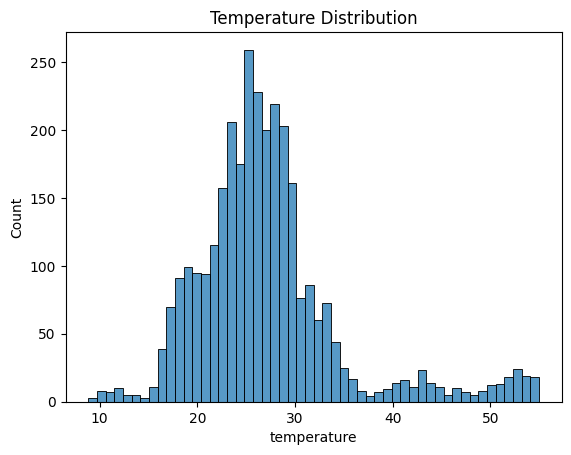

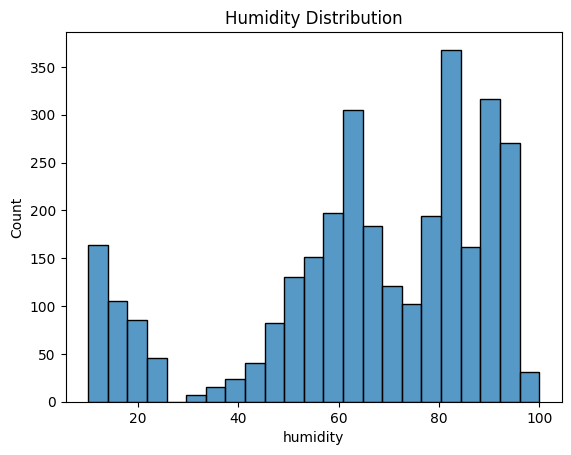

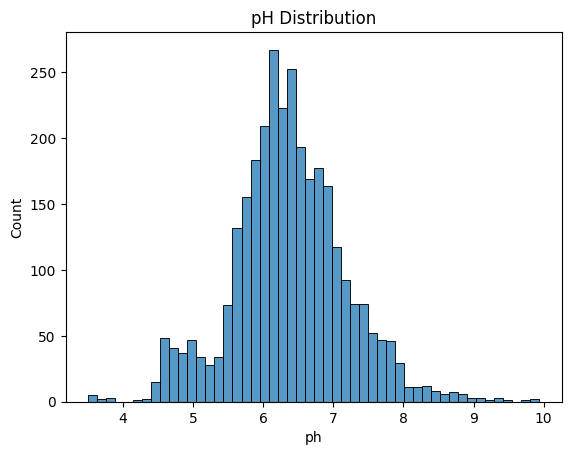

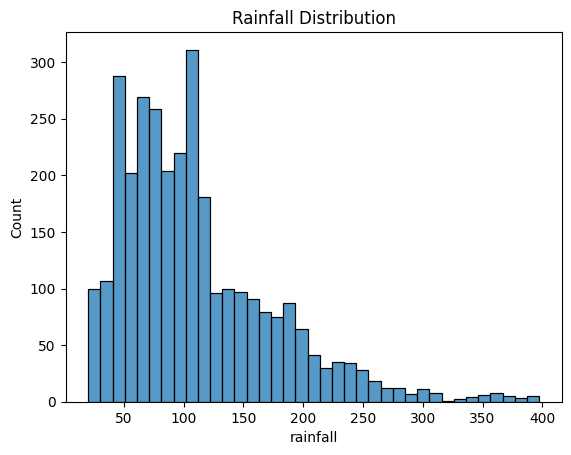

In [ ]:
# Visualize the distribution of each numerical variable
sns.histplot(data=cpdata, x='temperature')
plt.title('Temperature Distribution')
plt.show()

sns.histplot(data=cpdata, x='humidity')
plt.title('Humidity Distribution')
plt.show()

sns.histplot(data=cpdata, x='ph')
plt.title('pH Distribution')
plt.show()

sns.histplot(data=cpdata, x='rainfall')
plt.title('Rainfall Distribution')
plt.show()


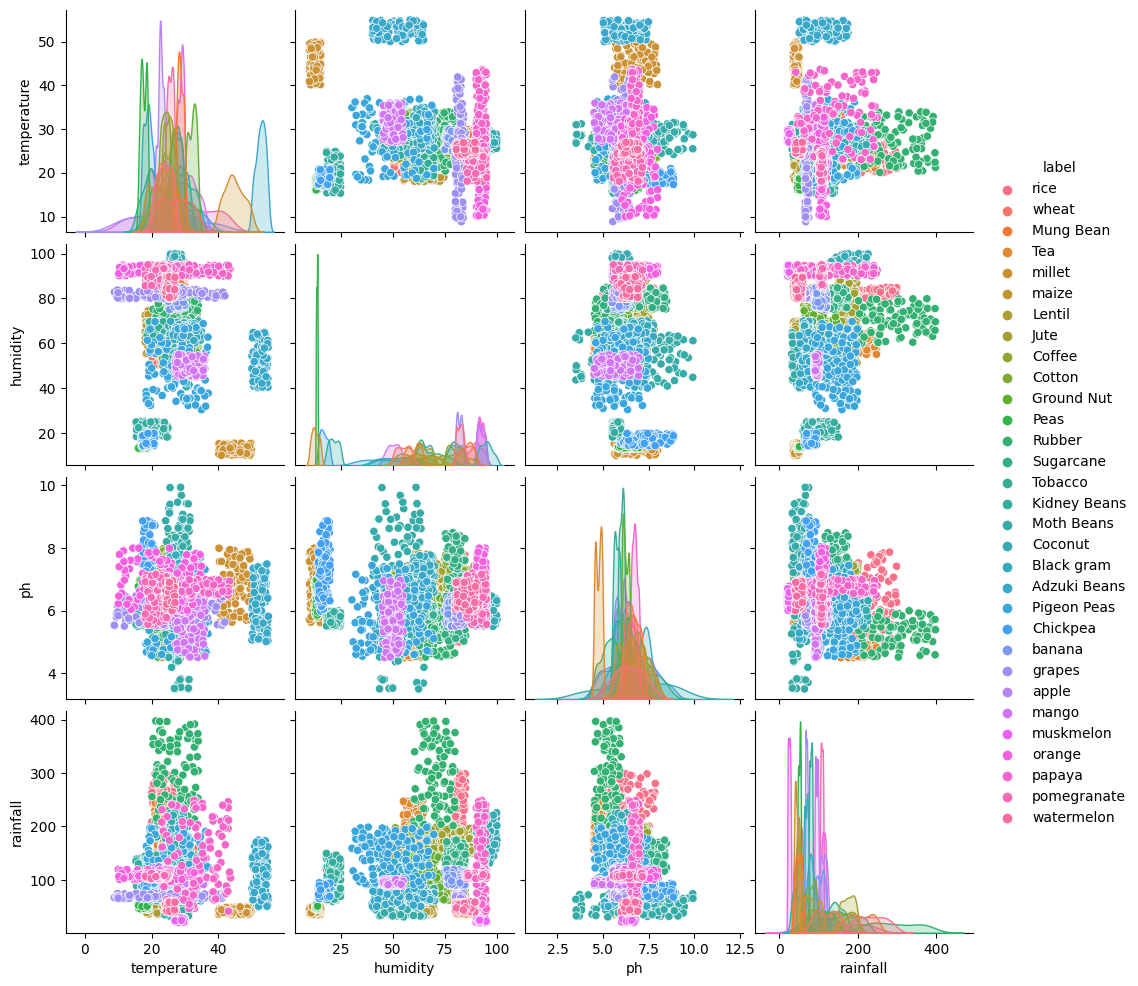

In [ ]:
# Visualize the relationship between variables using a pair plot
sns.pairplot(data=cpdata, hue='label')
plt.show()

<ipython-input-16-fb03d5235cb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cpdata.corr()


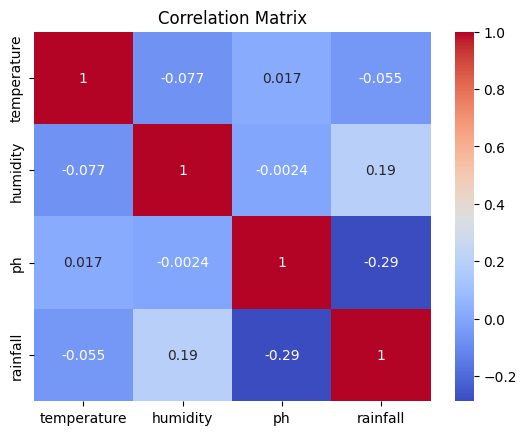

In [ ]:
# Visualize the correlation matrix
correlation_matrix = cpdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cpprod=pd.read_csv('/content/crop_production.csv')
cpprod.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
cpprod.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
cpprod.shape

(246091, 7)

In [ ]:
data = cpprod.dropna()
print(data.shape)
test = cpprod[~cpprod["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [ ]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

<ipython-input-21-7fccf581cd61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


In [ ]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


**Data Visulization**

<Axes: xlabel='Crop_Year', ylabel='Production'>

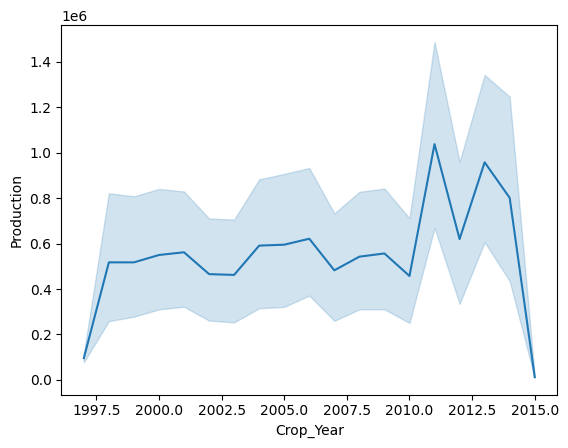

In [ ]:
sns.lineplot(x=data.Crop_Year, y=data.Production)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

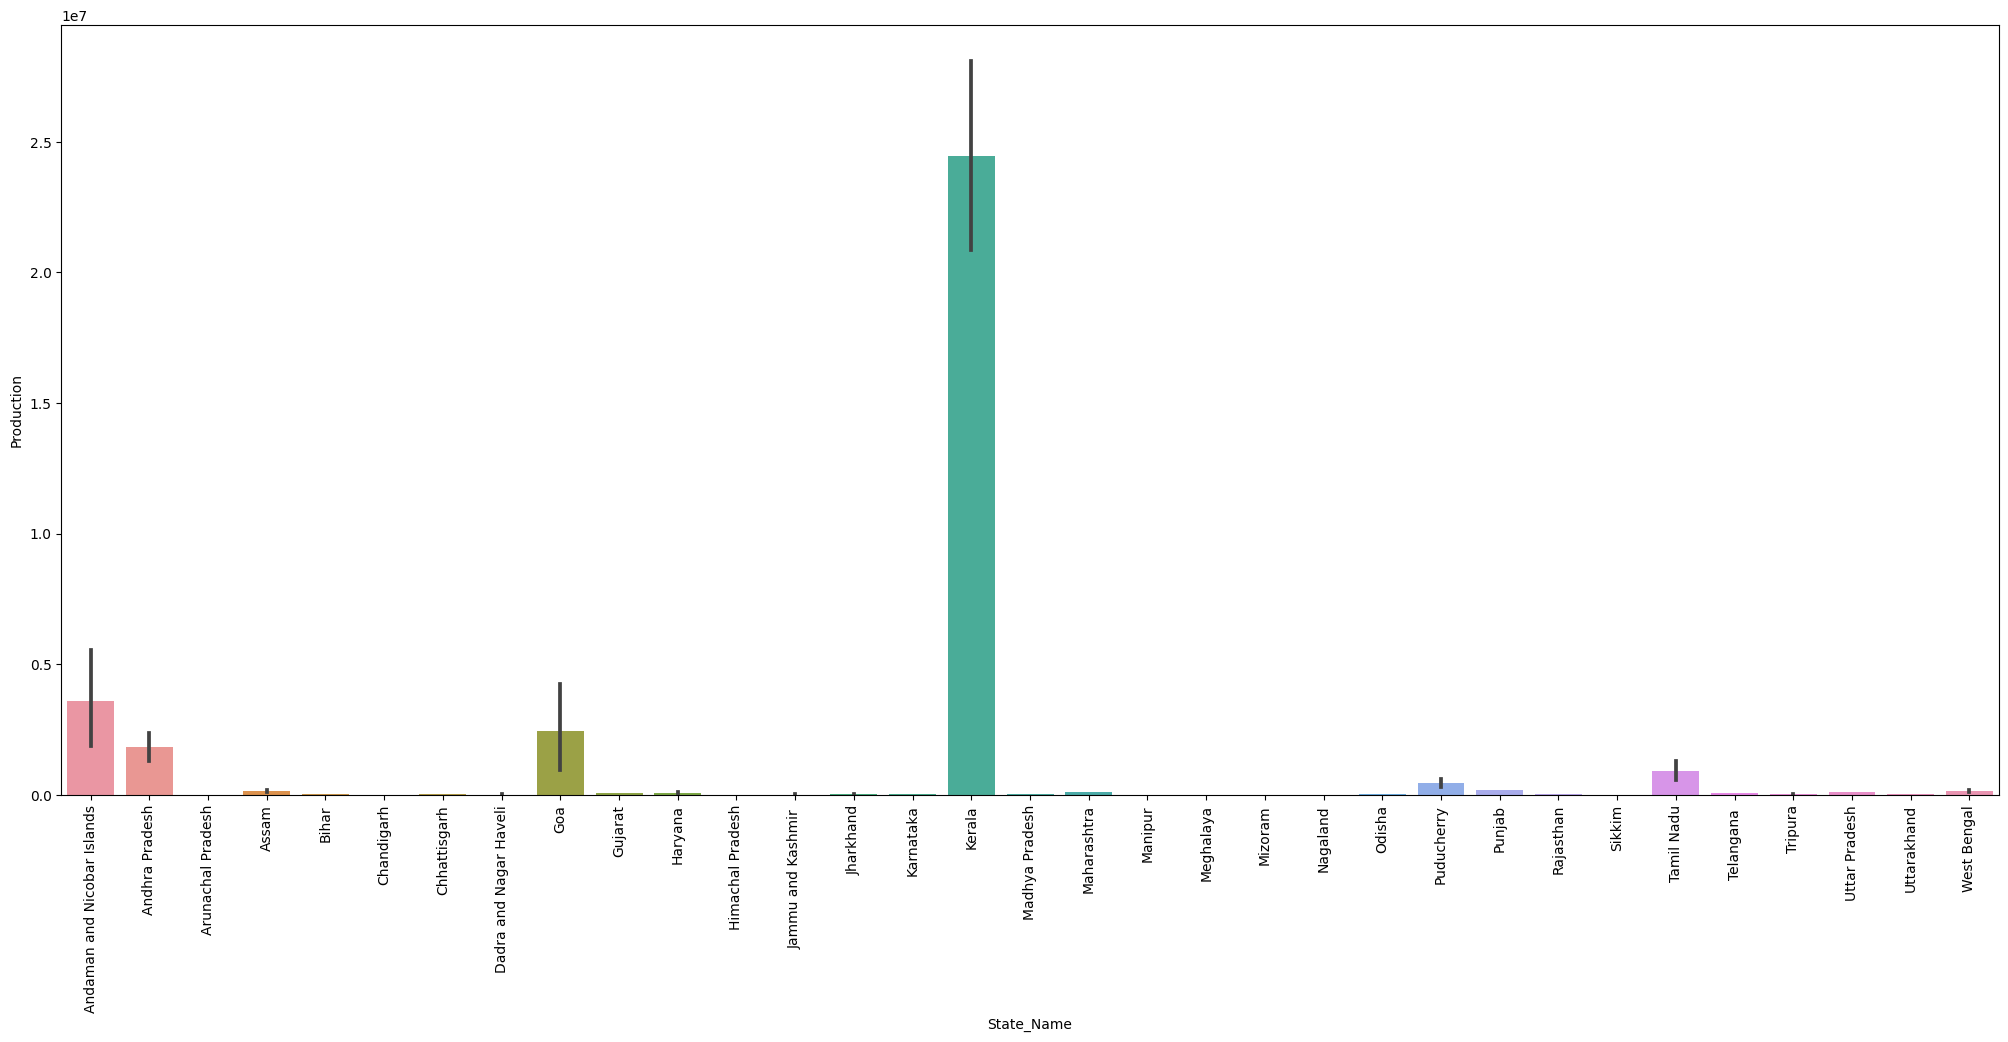

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x=data.State_Name,y=data.Production)
plt.xticks(rotation=90)

<Axes: xlabel='Season', ylabel='Production'>

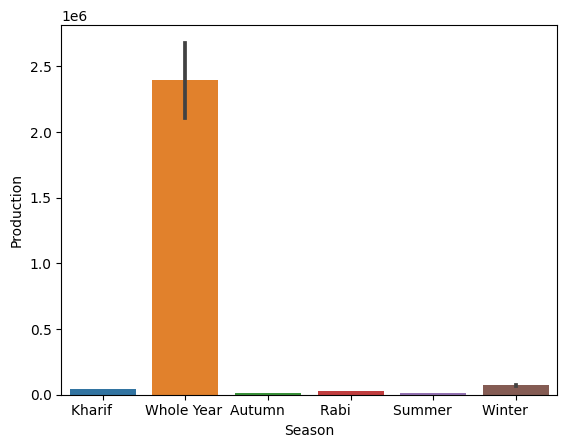

In [ ]:
sns.barplot(x=data.Season,y=data.Production)

In [ ]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [ ]:
data["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [ ]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


**Each type of crops required various area & various season. so, I'm going to pic top crop from this data**

**1.Rice**

In [ ]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


<Axes: xlabel='Season', ylabel='Production'>

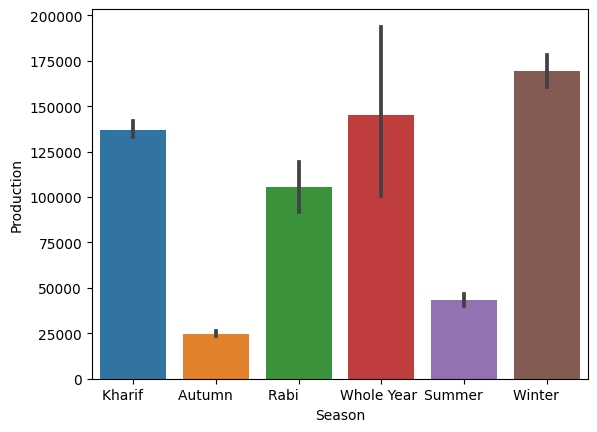

In [ ]:
sns.barplot(x=rice_df.Season,y=rice_df.Production)

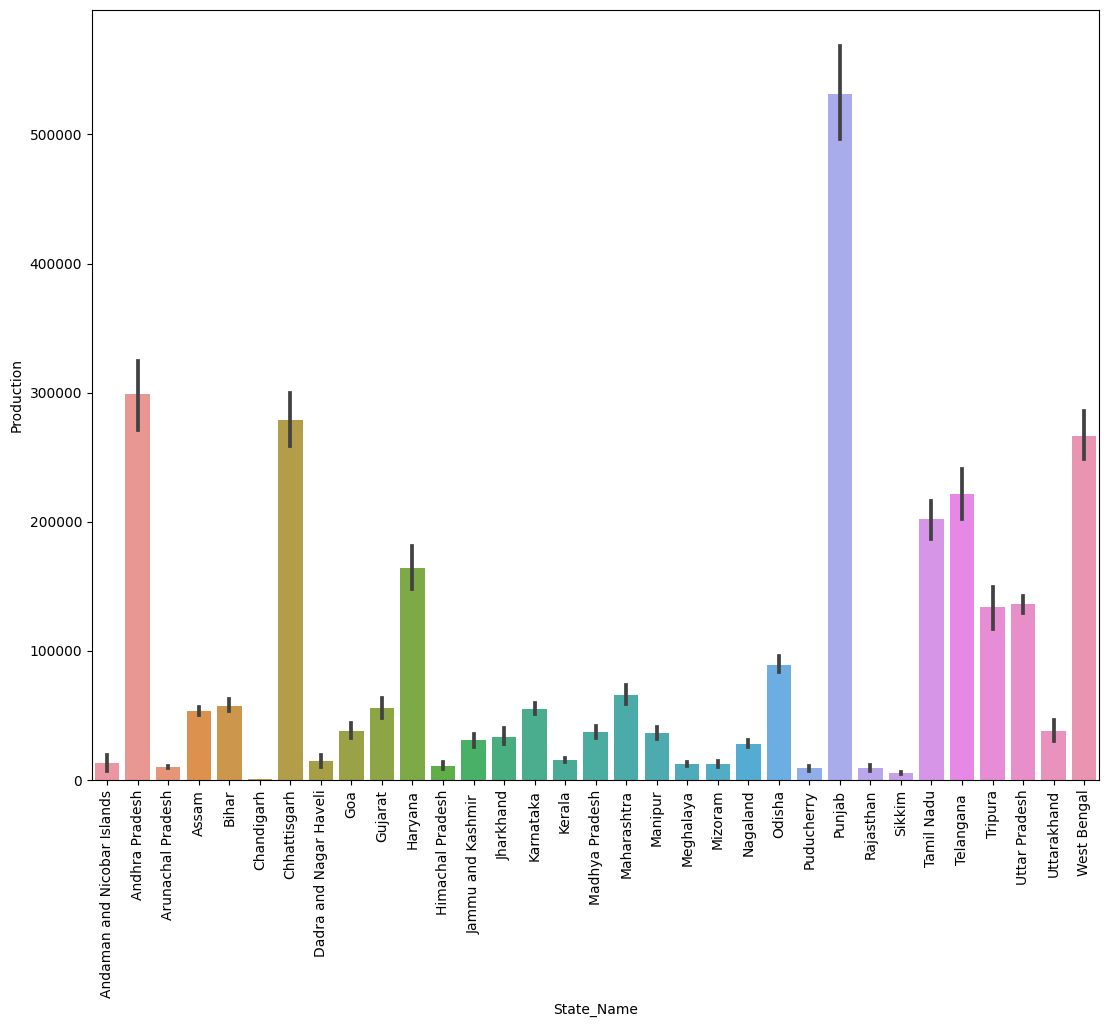

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x=rice_df.State_Name,y=rice_df.Production)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


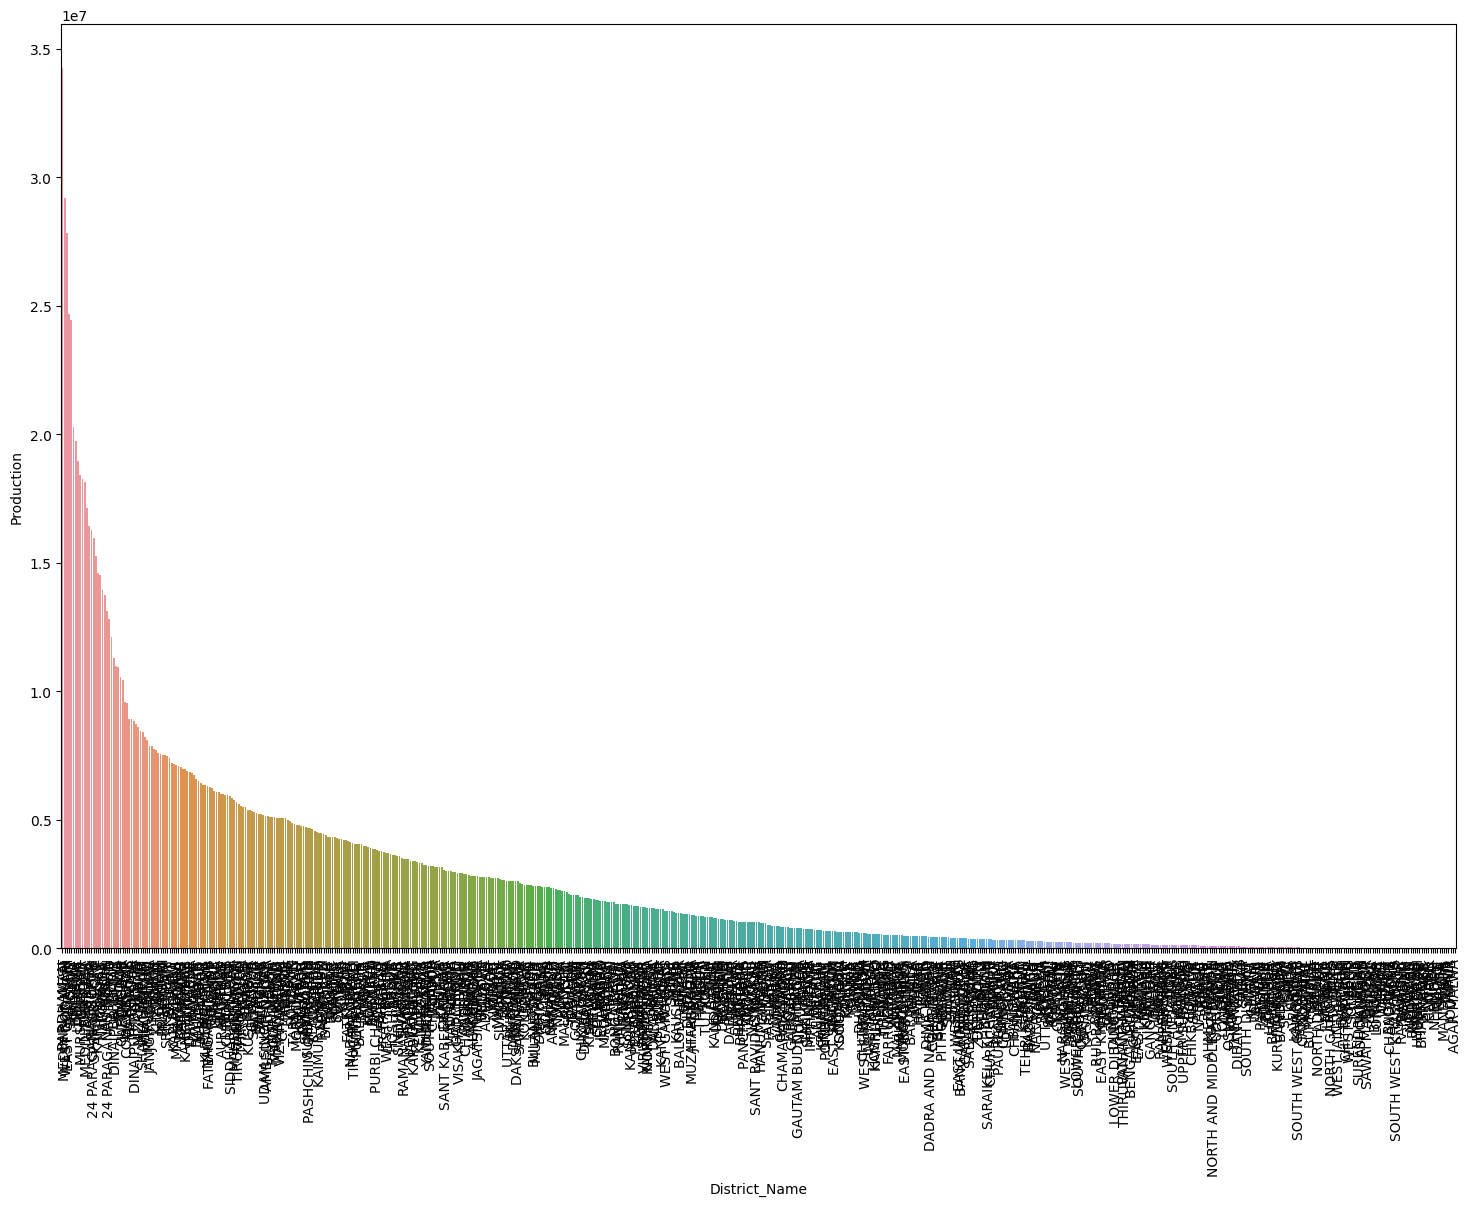

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x=top_rice_pro_dis.District_Name,y=top_rice_pro_dis.Production)
plt.xticks(rotation=90)
plt.show()

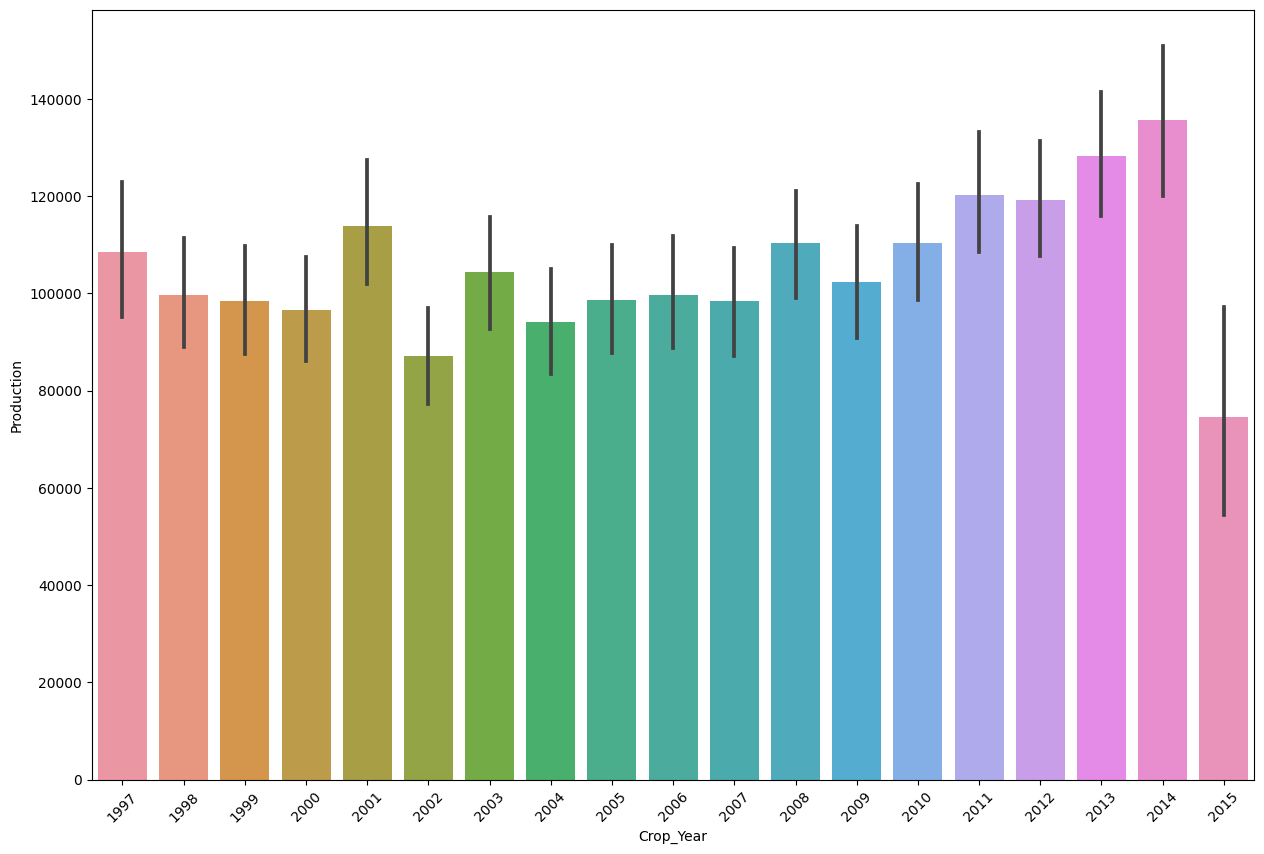

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=rice_df.Crop_Year,y=rice_df.Production)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

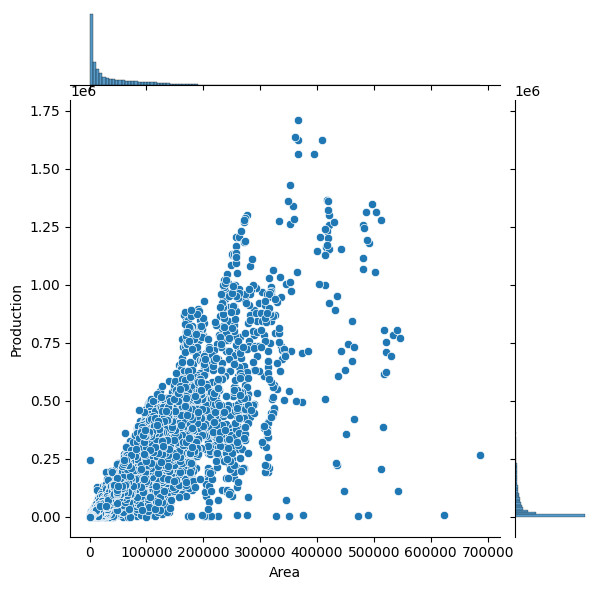

In [ ]:
sns.jointplot(x=rice_df.Area,y=rice_df.Production)

From Data Visualization: Rice production is mostly depends on Season, Area, State(place).

**2.Coconut**

In [ ]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


<Axes: xlabel='Season', ylabel='Production'>

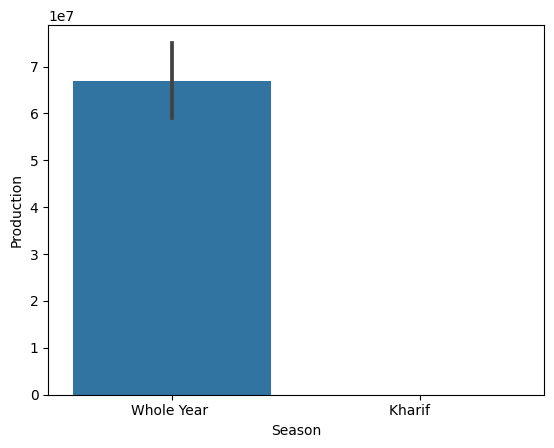

In [ ]:
sns.barplot(x=coc_df.Season,y=coc_df.Production)

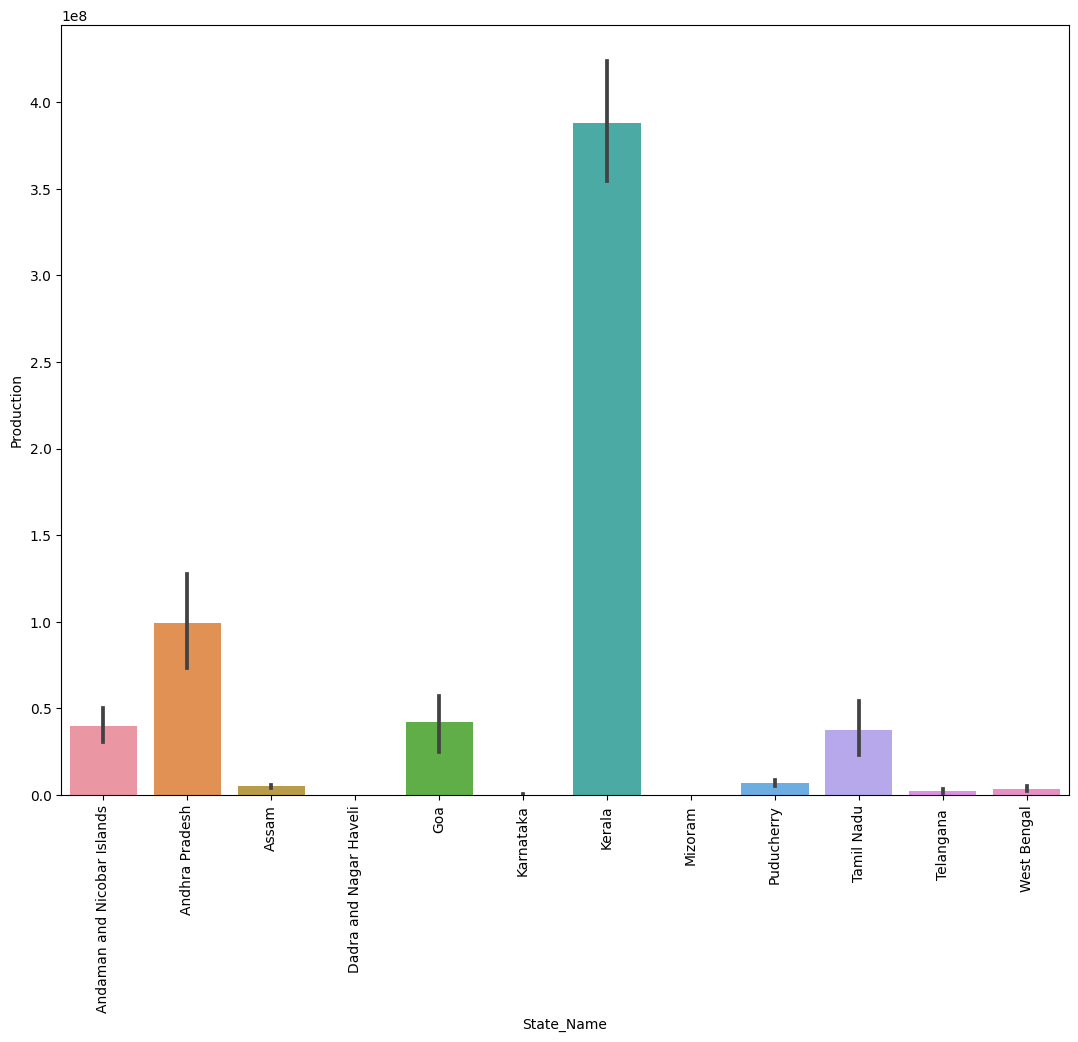

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x=coc_df.State_Name,y=coc_df.Production)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


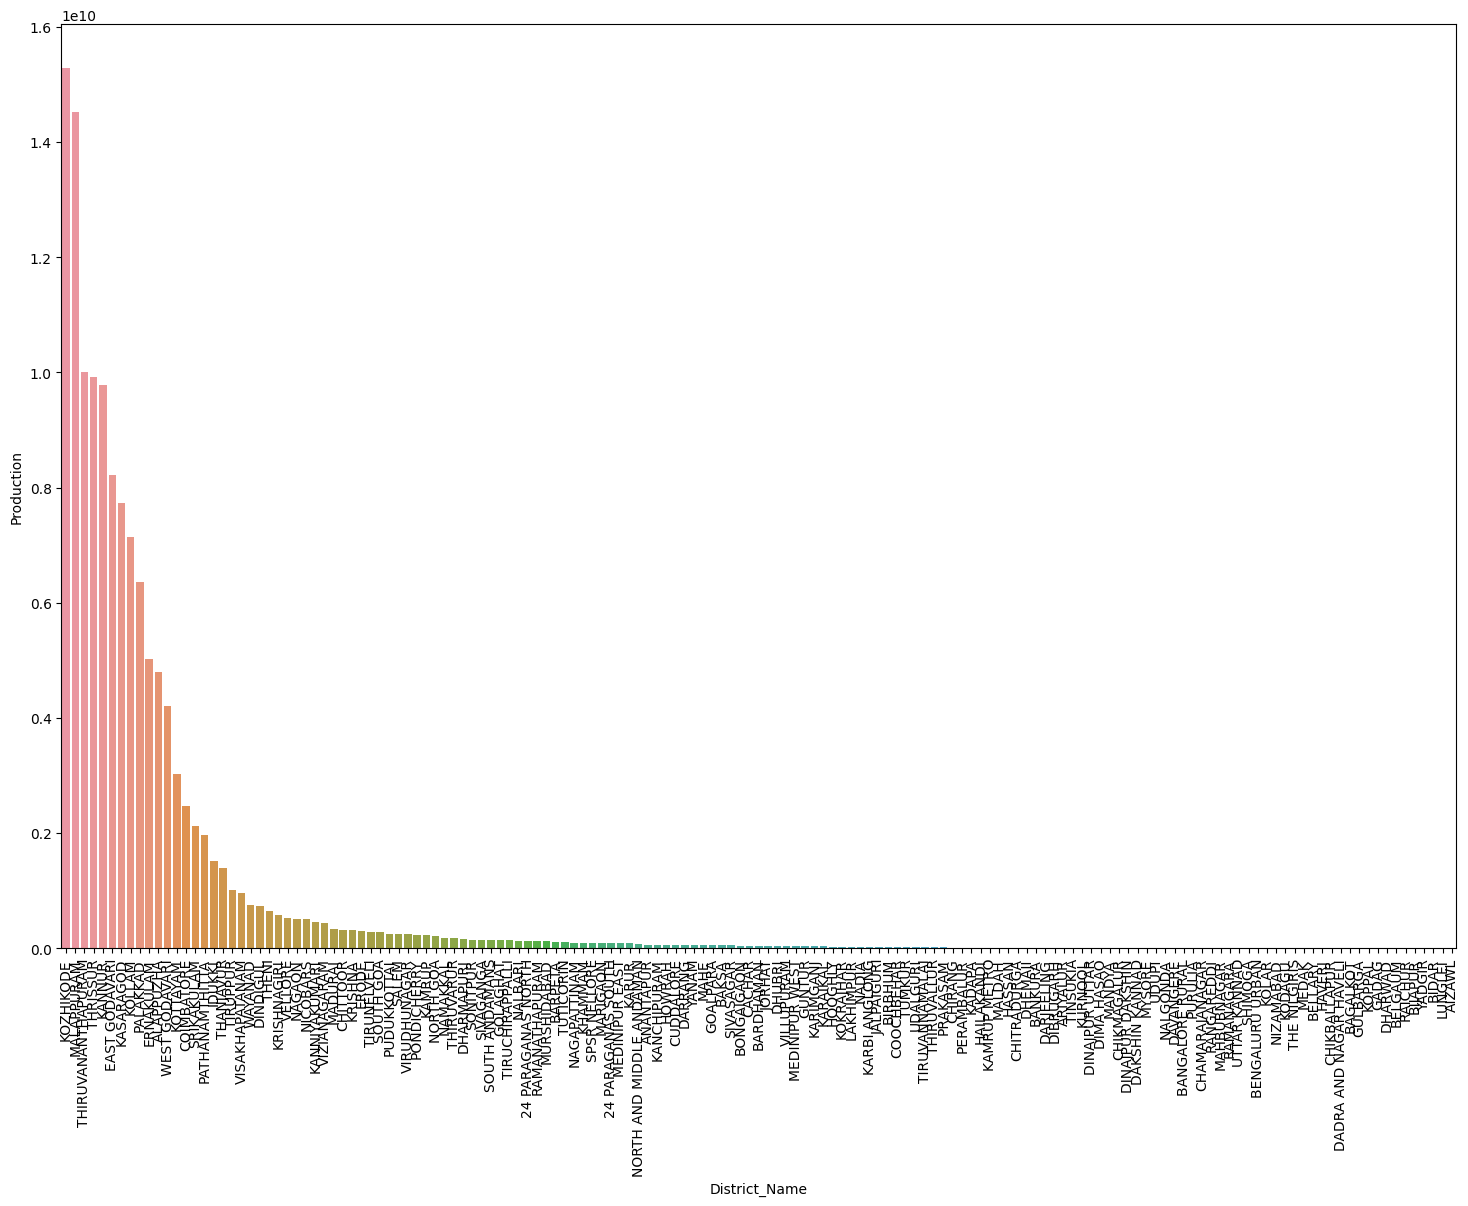

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x=top_coc_pro_dis.District_Name,y=top_coc_pro_dis.Production)
plt.xticks(rotation=90)
plt.show()

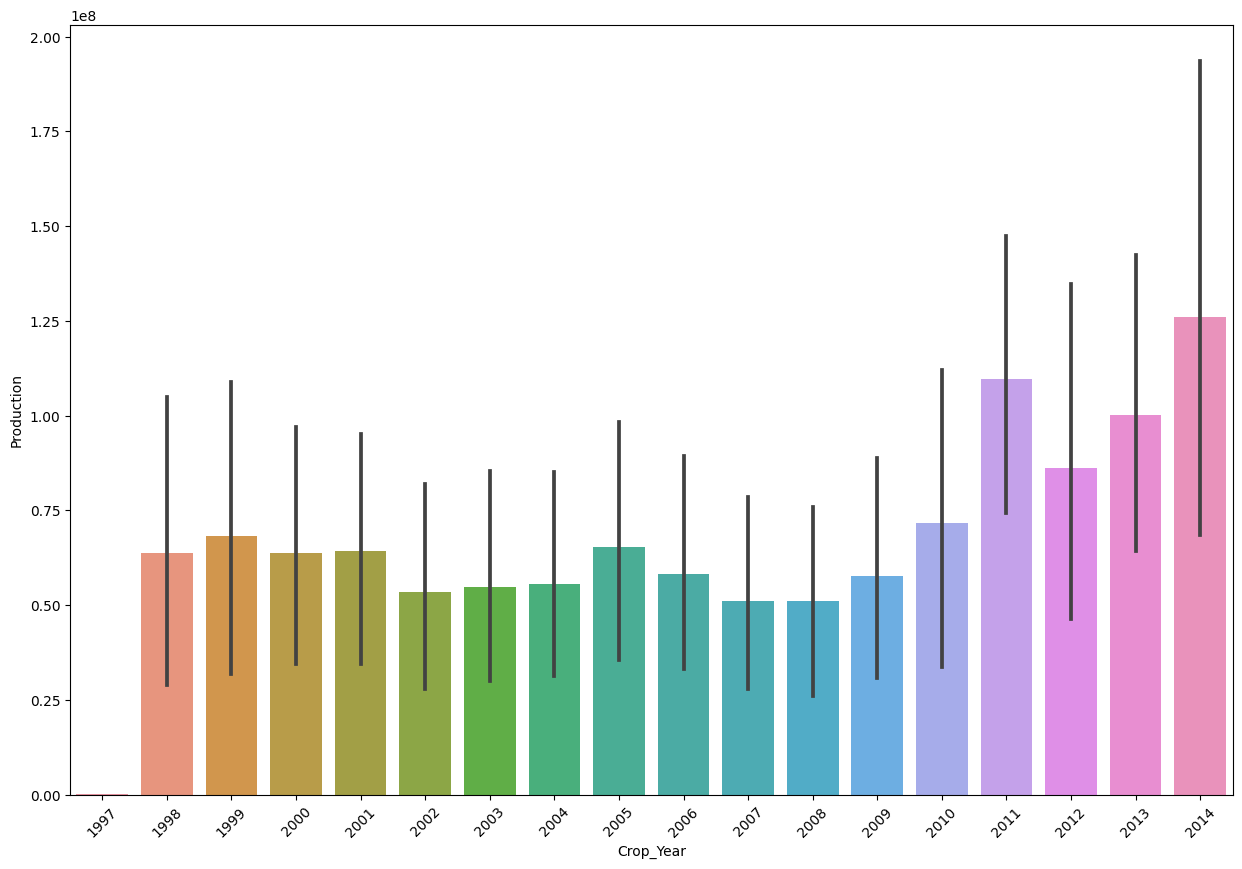

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=coc_df.Crop_Year,y=coc_df.Production)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

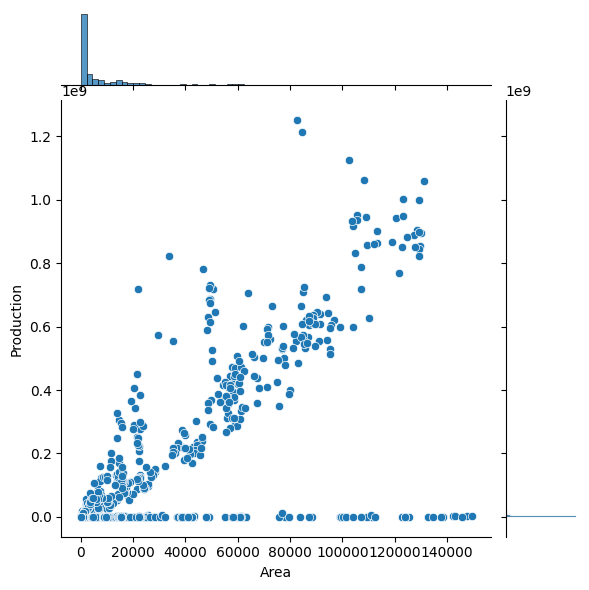

In [ ]:
sns.jointplot(x=coc_df.Area,y=coc_df.Production)

* cocunut production is directly proportional
to area.
*  its production is also gradually increasing over a time of period
*   production is highin kerala state
*   it does not depends on season








**3.Sugarcane**

In [ ]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,2.833340e-08


<Axes: xlabel='Season', ylabel='Production'>

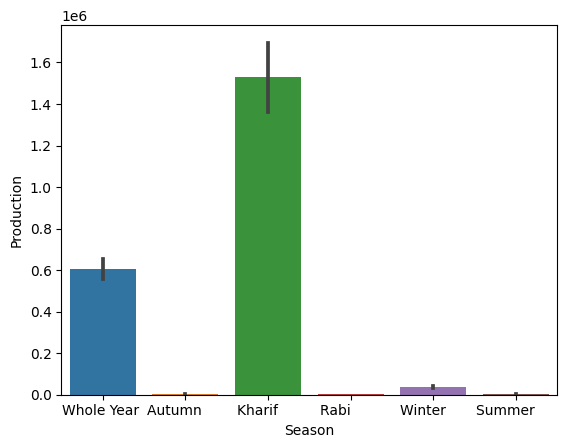

In [ ]:
sns.barplot(x=sug_df.Season,y=sug_df.Production)

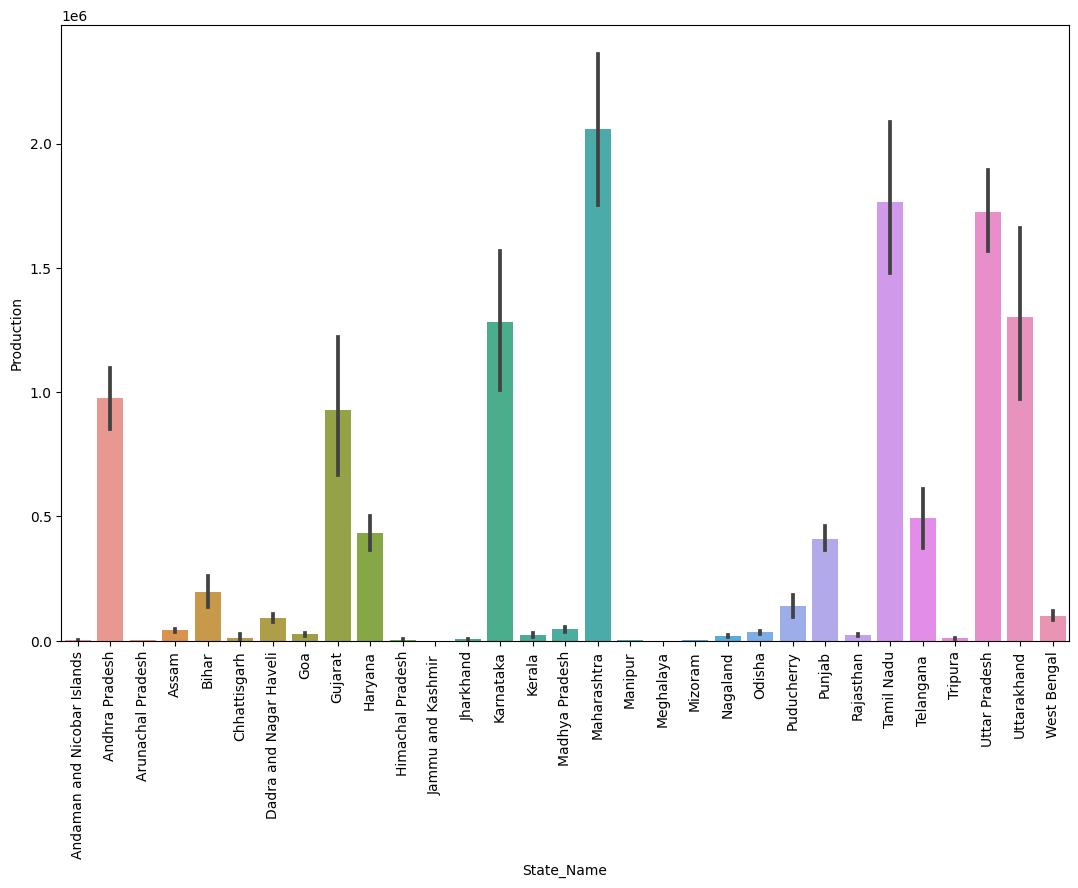

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x=sug_df.State_Name,y=sug_df.Production)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


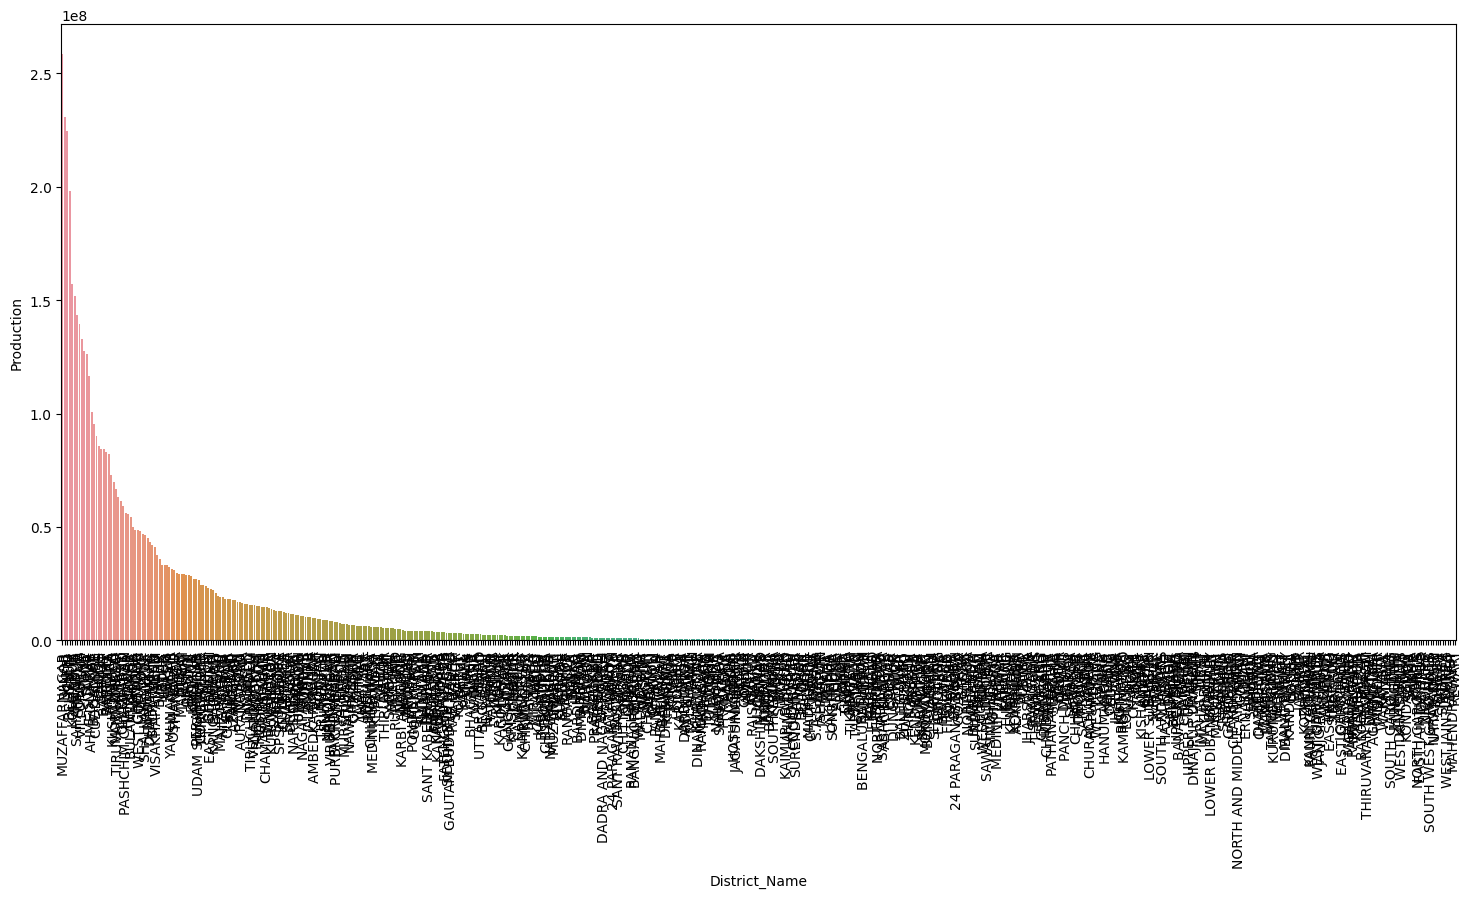

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_sug_pro_dis.District_Name,y=top_sug_pro_dis.Production)
plt.xticks(rotation=90)
plt.show()

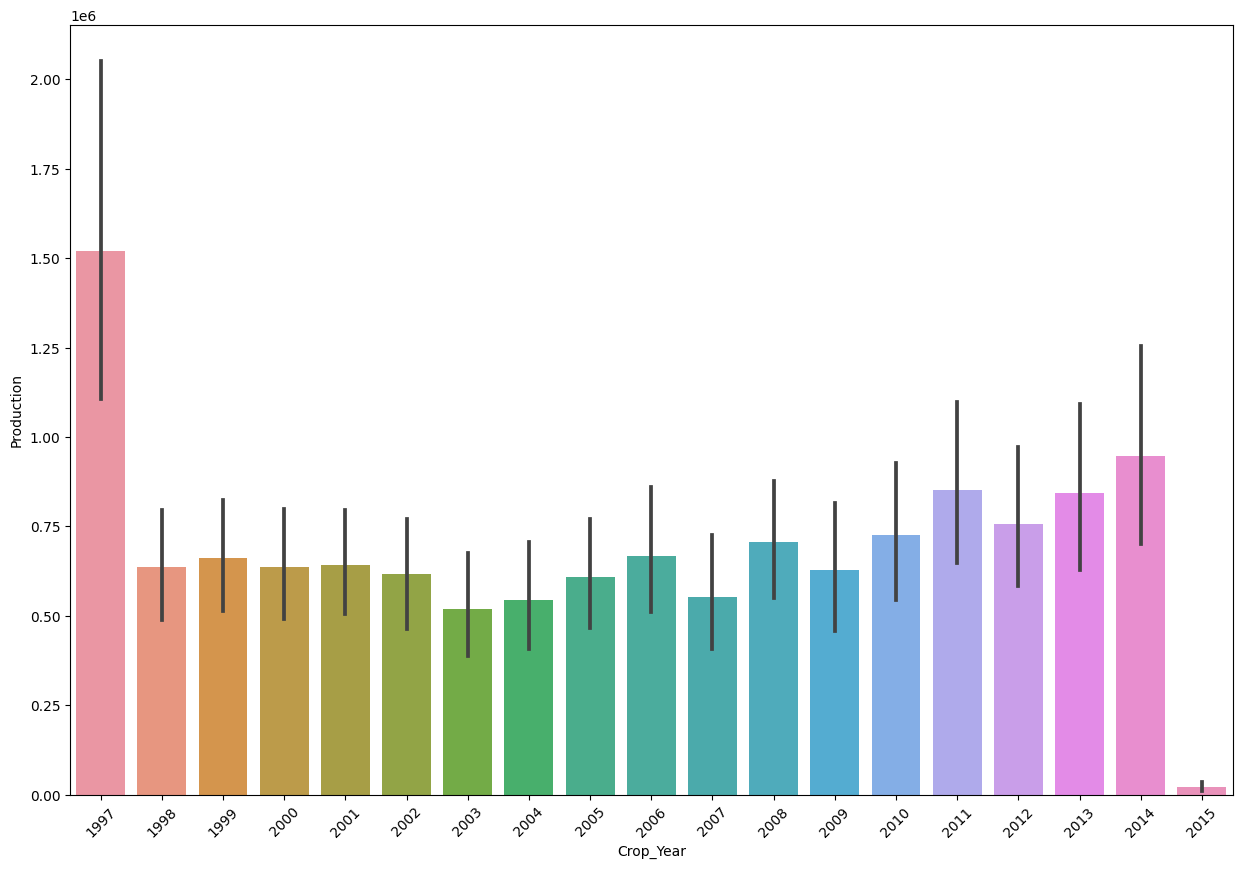

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=sug_df.Crop_Year,y=sug_df.Production)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

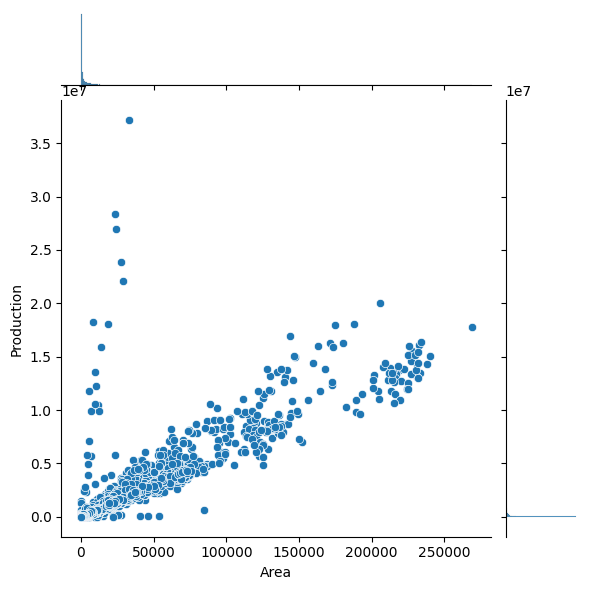

In [ ]:
sns.jointplot(x=sug_df.Area,y=sug_df.Production)

*  Sugarecane production is directly proportional to area
*   And the production is high in some state only.


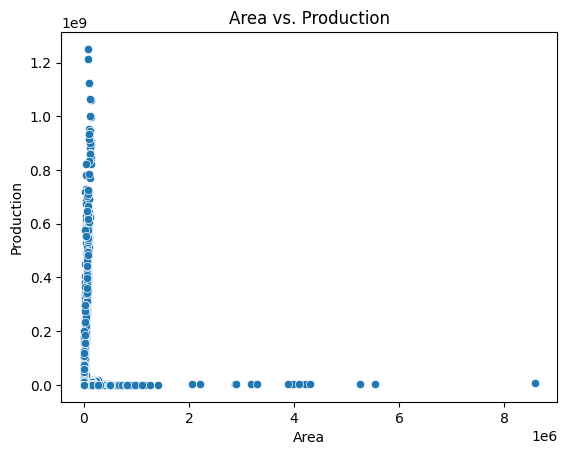

In [ ]:
sns.scatterplot(data=cpprod, x='Area', y='Production')
plt.title('Area vs. Production')
plt.show()

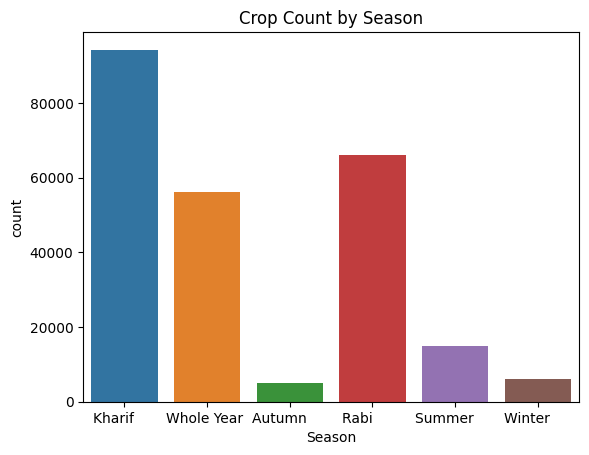

In [ ]:
# Visualize the count of crops in each season
sns.countplot(data=cpprod, x='Season')
plt.title('Crop Count by Season')
plt.show()

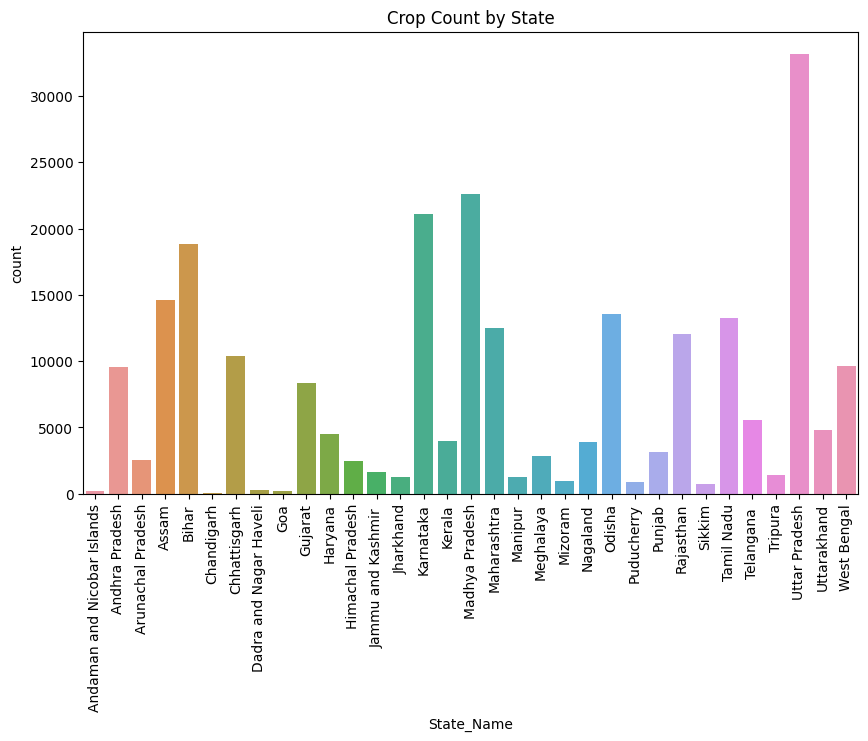

In [ ]:
# Visualize the count of crops in each state
plt.figure(figsize=(10, 6))
sns.countplot(data=cpprod, x='State_Name')
plt.title('Crop Count by State')
plt.xticks(rotation=90)
plt.show()

<ipython-input-25-1a915d4806c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cpprod.corr(),annot=True);


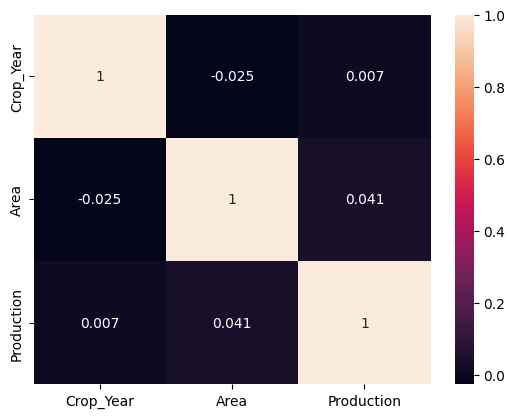

In [ ]:
plt.tick_params(labelsize=10)
sns.heatmap(cpprod.corr(),annot=True);

In [ ]:
cpprod.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
sum_maxp = cpprod["Production"].sum()
cpprod["percent_of_production"] = cpprod["Production"].map(lambda x:(x/sum_maxp)*100)

In [ ]:
cpprod[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


In [ ]:
cpph=pd.read_csv('cropph.csv')
cpph.head()

,Crop,Ph
0,Bajra,3.0
1,Banana,6.5
2,Barley,3.0
3,Bean,5.5
4,Black pepper,6.4


In [ ]:
cpph.columns

Index(['Crop', ' Ph'], dtype='object')

In [ ]:
cpph.describe()

,Ph
count,58.000000
mean,5.727759
std,1.014469
min,3.000000
25%,5.000000
50%,5.550000
75%,6.375000
max,8.000000


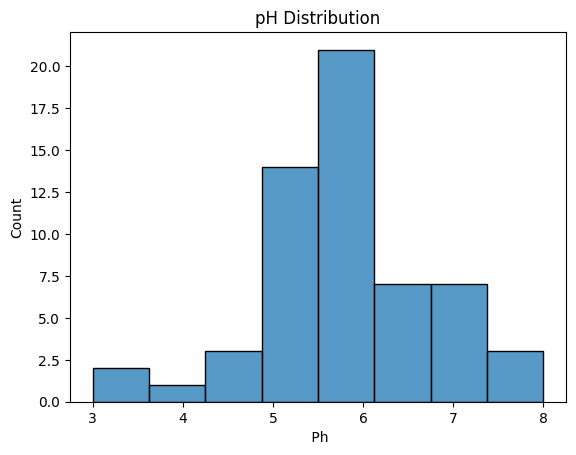

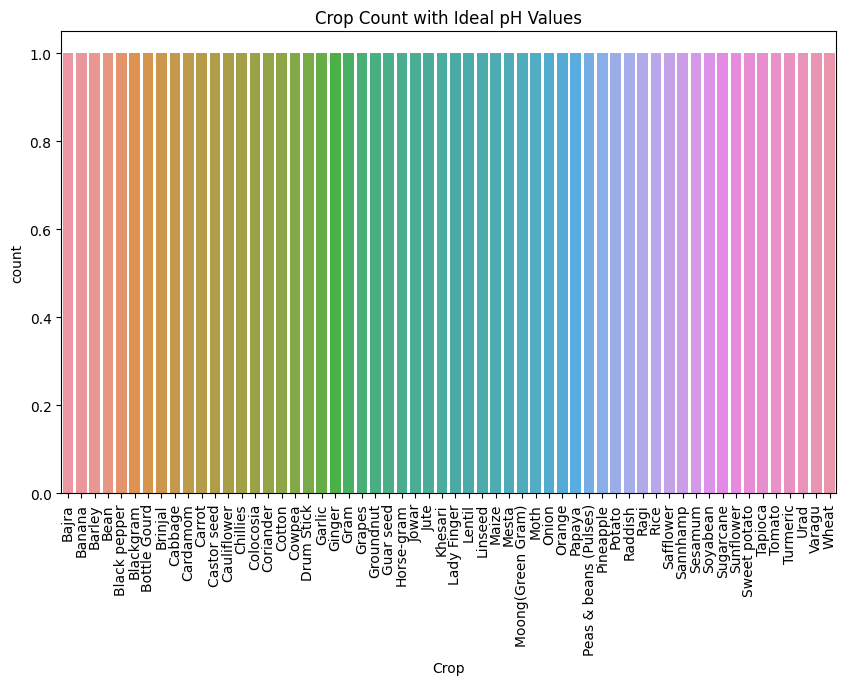

In [ ]:
# Visualize the distribution of pH values
sns.histplot(data=cpph, x=' Ph')
plt.title('pH Distribution')
plt.show()

# Visualize the count of crops with ideal pH values
plt.figure(figsize=(10, 6))
sns.countplot(data=cpph, x='Crop')
plt.title('Crop Count with Ideal pH Values')
plt.xticks(rotation=90)
plt.show()


In [ ]:
cpvaries=pd.read_csv('/content/cropproductiononvariousfactors.csv')
cpvaries.head()

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra


In [ ]:
cpvaries.columns

Index(['Rainfall', 'Temperature', 'Ph', 'Crop', 'Production',
       'Cropconversion'],
      dtype='object')

In [ ]:
# Get the summary statistics of the dataset
print(cpvaries.describe())

            Rainfall    Temperature             Ph     Production
count  189232.000000  189232.000000  189232.000000  189232.000000
mean      693.417573      25.262492       6.337846       5.262677
std       288.988419       4.585660       0.788959      14.441616
min       100.003400       7.000000       3.000000       0.000340
25%       516.000000      22.026830       5.800000       0.584420
50%       628.702885      25.000000       6.300000       1.166670
75%       770.000000      28.215000       6.900000       2.989630
max      3000.000000      39.045000       8.800000     955.750340


In [ ]:
# Check the data types of each column
print(cpvaries.dtypes)

Rainfall          float64
Temperature       float64
Ph                float64
Crop               object
Production        float64
Cropconversion     object
dtype: object


In [ ]:
# Check for missing values
print(cpvaries.isnull().sum())

Rainfall          0
Temperature       0
Ph                0
Crop              0
Production        0
Cropconversion    0
dtype: int64


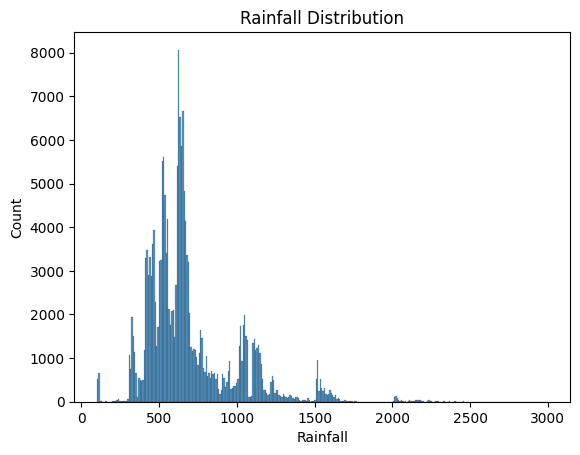

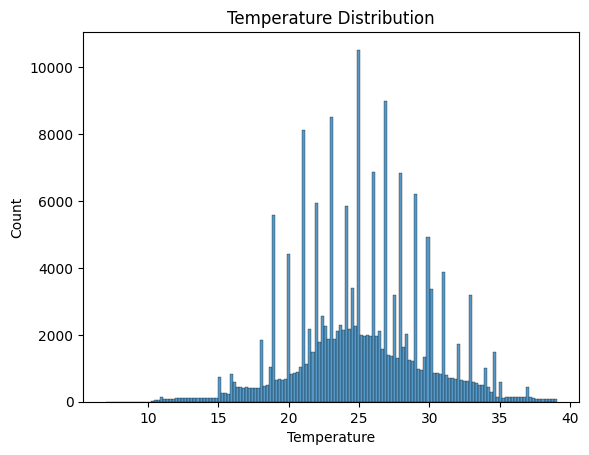

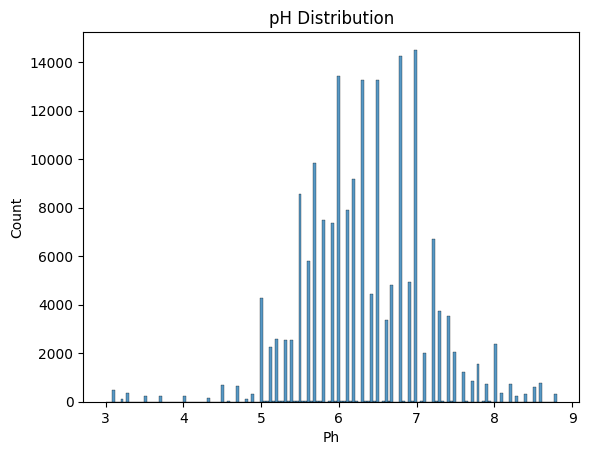

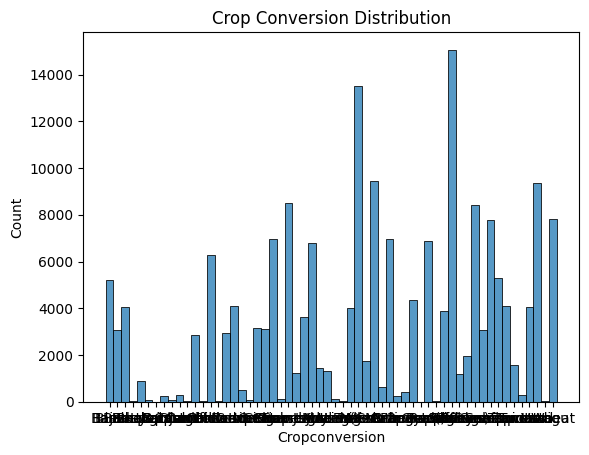

In [ ]:
# Visualize the distribution of 'Rainfall', 'Temperature', 'Ph', and 'Cropconversion'
sns.histplot(data=cpvaries, x='Rainfall')
plt.title('Rainfall Distribution')
plt.show()

sns.histplot(data=cpvaries, x='Temperature')
plt.title('Temperature Distribution')
plt.show()

sns.histplot(data=cpvaries, x='Ph')
plt.title('pH Distribution')
plt.show()

sns.histplot(data=cpvaries, x='Cropconversion')
plt.title('Crop Conversion Distribution')
plt.show()

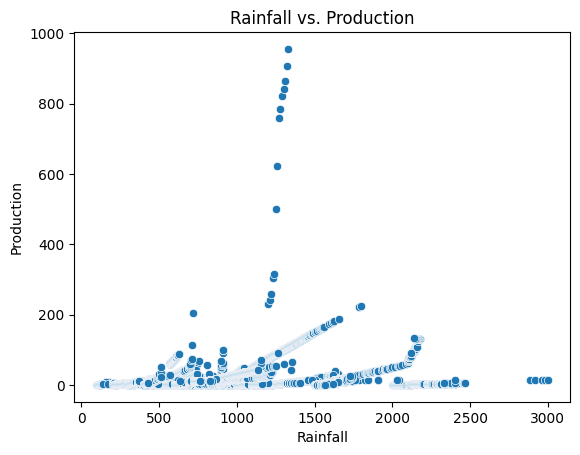

In [ ]:
# Visualize the relationship between 'Rainfall' and 'Production' using a scatter plot
sns.scatterplot(data=cpvaries, x='Rainfall', y='Production')
plt.title('Rainfall vs. Production')
plt.show()

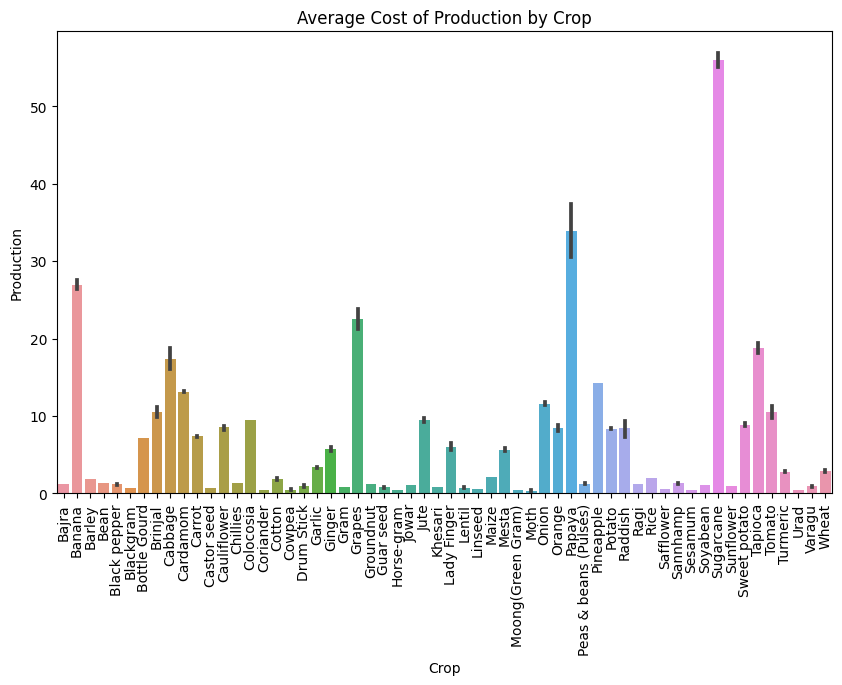

In [ ]:
# Visualize the average cost of production by crop
plt.figure(figsize=(10, 6))
sns.barplot(data=cpvaries, x='Crop', y='Production')
plt.title('Average Cost of Production by Crop')
plt.xticks(rotation=90)
plt.show()

In [ ]:
statecp=pd.read_csv('/content/state_wise_crop_production.csv')
statecp.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [ ]:
statecp.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [ ]:

# Get the summary statistics of the dataset
print(statecp.describe())

# Check the data types of each column
print(statecp.dtypes)

# Check for missing values
print(statecp.isnull().sum())


       Cost of Cultivation (`/Hectare) A2+FL  \
count                              49.000000   
mean                            20363.537347   
std                             13561.435306   
min                              5483.540000   
25%                             12774.410000   
50%                             17022.000000   
75%                             24731.060000   
max                             66335.060000   

       Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                           49.000000                          49.000000   
mean                         31364.666735                        1620.537755   
std                          20095.783569                        1104.990472   
min                           7868.640000                          85.790000   
25%                          19259.840000                         732.620000   
50%                          25909.050000                        1595.560000   
75%    

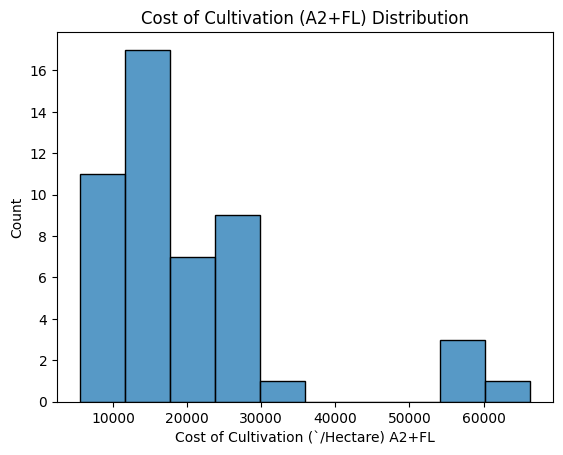

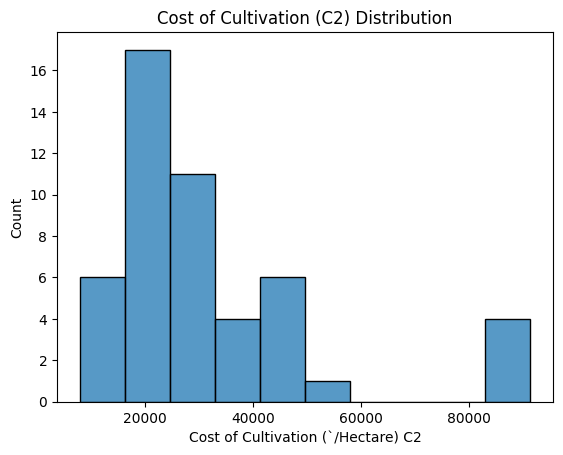

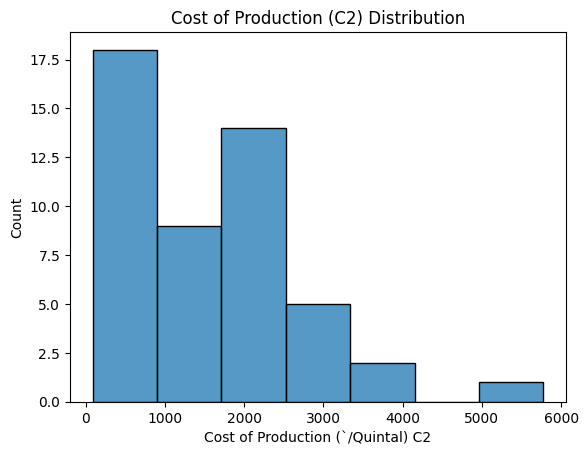

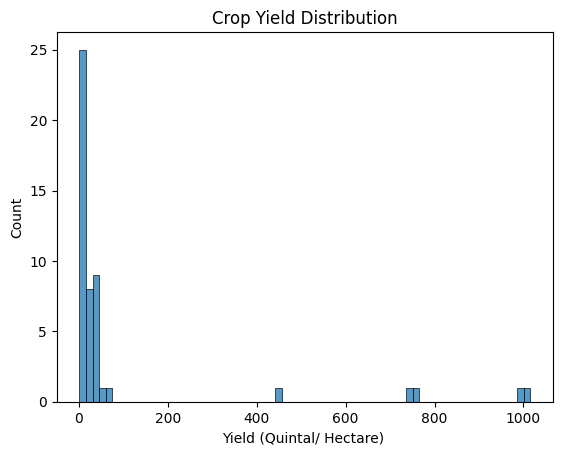

In [ ]:
# Visualize the distribution of 'Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2',
# 'Cost of Production (`/Quintal) C2', and 'Yield (Quintal/ Hectare)'
sns.histplot(data=statecp, x='Cost of Cultivation (`/Hectare) A2+FL')
plt.title('Cost of Cultivation (A2+FL) Distribution')
plt.show()

sns.histplot(data=statecp, x='Cost of Cultivation (`/Hectare) C2')
plt.title('Cost of Cultivation (C2) Distribution')
plt.show()

sns.histplot(data=statecp, x='Cost of Production (`/Quintal) C2')
plt.title('Cost of Production (C2) Distribution')
plt.show()

sns.histplot(data=statecp, x='Yield (Quintal/ Hectare) ')
plt.title('Crop Yield Distribution')
plt.show()


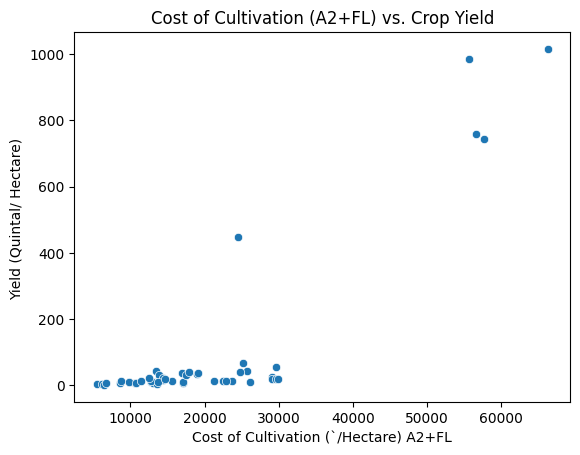

In [ ]:
# Visualize the relationship between 'Cost of Cultivation (`/Hectare) A2+FL' and 'Yield (Quintal/ Hectare)'
sns.scatterplot(data=statecp, x='Cost of Cultivation (`/Hectare) A2+FL', y='Yield (Quintal/ Hectare) ')
plt.title('Cost of Cultivation (A2+FL) vs. Crop Yield')
plt.show()

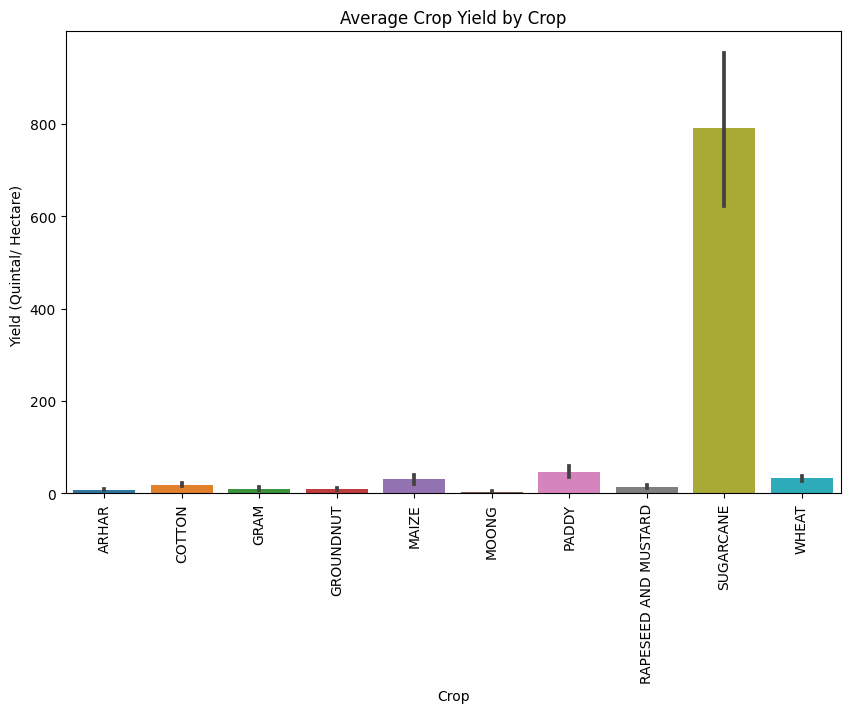

In [ ]:
# Visualize the average yield by crop
plt.figure(figsize=(10, 6))
sns.barplot(data=statecp, x='Crop', y='Yield (Quintal/ Hectare) ')
plt.title('Average Crop Yield by Crop')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df = pd.concat([cpdata, cpph, cpvaries, cpprod, cpprod], axis=1)

In [ ]:
print(df.shape)

(245800, 27)


In [ ]:
df.to_csv("Crop_Production_in_India.csv", index=False)

In [ ]:
df.head()

,temperature,humidity,ph,rainfall,label,Crop,Ph,Rainfall,Temperature,Ph,...,Crop,Area,Production,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,20.879744,82.002744,6.502985,202.935536,rice,Bajra,3.0,400.15082,20.0,3.0,...,Arecanut,1254.0,2000.0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,21.770462,80.319644,7.038096,226.655537,rice,Banana,6.5,400.16331,20.0,3.2,...,Other Kharif pulses,2.0,1.0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,23.004459,82.320763,7.840207,263.964248,rice,Barley,3.0,400.16387,20.0,3.2,...,Rice,102.0,321.0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,26.491096,80.158363,6.980401,242.864034,rice,Bean,5.5,400.17967,20.0,3.2,...,Banana,176.0,641.0,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,20.130175,81.604873,7.628473,262.717340,rice,Black pepper,6.4,400.19582,20.0,3.2,...,Cashewnut,720.0,165.0,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [ ]:
cpprod.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
data1 = cpprod.drop(["District_Name","Crop_Year"],axis=1)

In [ ]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 164)
x_test : (79980, 164)
y_train : (162381, 1)
y_test : (79980, 1)


In [ ]:
x_train[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,1250.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240277,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20664,60.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157859,605.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Machine Learning Techniques**

**1.RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.705642073463


**2.LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
preds = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.14641046241956368

**3.XGBRegressor**

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
preds = xgbr.predict(x_test)

mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.6622614038270992

**4.DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
preds = regressor.predict(x_test)

mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.6172159683960345

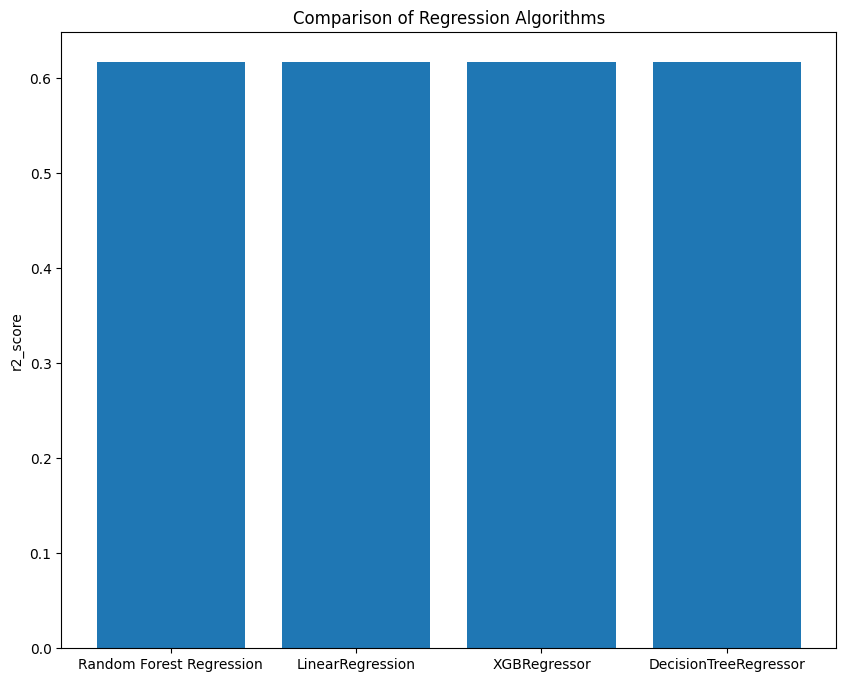

In [ ]:
plt.figure(figsize=(10,8))
y = np.array([r2_score(y_test,preds),r2_score(y_test,preds),r2_score(y_test,preds),r2_score(y_test,preds)])
x = ["Random Forest Regression","LinearRegression","XGBRegressor","DecisionTreeRegressor"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()